### Exercise: Scrape `unegui.mn`
* Scrape apartment listings from `https://www.unegui.mn/l-hdlh/l-hdlh-zarna/oron-suuts-zarna/`
* Use only the first page
  * Get the `listing title` and `listing price`
  * Make a dataframe and make a histogram using `listing price`

In [1]:
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import requests
from bs4 import BeautifulSoup

In [2]:
# Your code here
response = requests.get("https://www.unegui.mn/l-hdlh/l-hdlh-zarna/oron-suuts-zarna/")

In [3]:
soup = BeautifulSoup(response.content)

In [4]:
soup

<!DOCTYPE html>
<html lang="mn">
<head>
<meta charset="utf-8"/>
<meta content="telephone=no" name="format-detection"/>
<link href="https://www.unegui.mn/static/favicons/favicon.ad97eb2fafd2.ico" rel="icon" type="image/x-icon"/>
<link href="https://www.unegui.mn/static/favicons/favicon.ad97eb2fafd2.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="https://www.unegui.mn/static/images/app-icons/unegui/57.96c37a4cf7cc.png" rel="apple-touch-icon"/>
<link href="https://www.unegui.mn/static/images/app-icons/unegui/57.96c37a4cf7cc.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="https://www.unegui.mn/static/images/app-icons/unegui/72.4d8e269ca67b.png" rel="apple-touch-icon" sizes="72x72"/>
<link href="https://www.unegui.mn/static/images/app-icons/unegui/114.6af90caa6356.png" rel="apple-touch-icon" sizes="114x114"/>
<link href="https://www.unegui.mn/static/images/app-icons/unegui/120.2083a12e5343.png" rel="apple-touch-icon" sizes="120x120"/>
<link href="https://www.unegui.mn/sta

#### Getting the titles

In [5]:
list_titles = soup.find_all("a", {"class":"announcement-block__title"})

In [6]:
list_titles

[<a class="announcement-block__title" content="River plaza-д 216мкв 5 өрөө" href="/adv/7711140_river-plaza-d-5-oroo-khudaldana/" itemprop="name">
               River plaza-д 216мкв 5 өрөө 
             </a>,
 <a class="announcement-block__title" content="4-р хороололд хуучнаар од кино театрын урд зам дагуу 3 өрөө 40м2 байр" href="/adv/7708333_4-r-khoroolold-khuuchnaar-od-kino-teatryn-urd-zam-daguu-3-oroo-40m2-bair/" itemprop="name">
               4-р хороололд хуучнаар од кино театрын урд зам дагуу 3 өрөө 40м2 байр 
             </a>,
 <a class="announcement-block__title" content="Хотын төв цирк хажууд 1а байр 2 өрөө орон сууц" href="/adv/7720294_khotyn-tov-tsirk-khazhuud-1a-bair-2-oroo-oron-suuts/" itemprop="name">
               Хотын төв цирк хажууд 1а байр 2 өрөө орон сууц 
             </a>,
 <a class="announcement-block__title" content="Богд ар хороололд гал тогоо тусдаа 1 өрөө байр" href="/adv/7718133_bogd-ar-khoroolold-gal-togoo-tusdaa-1-oroo-bair-zarna/" itemprop="name">
   

In [7]:
list_titles[0]

<a class="announcement-block__title" content="River plaza-д 216мкв 5 өрөө" href="/adv/7711140_river-plaza-d-5-oroo-khudaldana/" itemprop="name">
              River plaza-д 216мкв 5 өрөө 
            </a>

In [9]:
list_titles[0].get_text().strip()

'River plaza-д 216мкв 5 өрөө'

In [10]:
list_titles = [x.get_text().strip() for x in list_titles]

In [11]:
list_titles

['River plaza-д 216мкв 5 өрөө',
 '4-р хороололд хуучнаар од кино театрын урд зам дагуу 3 өрөө 40м2 байр',
 'Хотын төв цирк хажууд 1а байр 2 өрөө орон сууц',
 'Богд ар хороололд гал тогоо тусдаа 1 өрөө байр',
 'King tower 5 өрөө байр',
 'Төмөр зам, 25 -ын kfc-н замын урд төв зам дагуу 4 өрөө орон сууц',
 'Energy luxury residence 4 өрөө 113.19m2',
 '2 өрөө байр 51.36m2',
 'Худ зайсангийн оргил худалдааны төвийн урд 4 өрөө 131м2 байр',
 'Tokyo town 1 хотхонд 4 өрөө байр 110.56m2',
 'Зайсан номун виллаж-д дуплекс 5 өрөө байр',
 'Нарт3 хотхонд 1 өрөө байр 33.4m2',
 'Сансар 1 өрөө',
 '115 сургуулийн урд 4 өрөө байр 108м2',
 'Lite citi / лайт сити хотхон 3 өрөө',
 'Модны 2-т дуплекс 5 өрөө байр 230,5м2',
 'Бзд 16-р хороо sky residence 3 хотхонд 29мкв 1 өрөө байр',
 'Алтай хотхон 2 өрөө 61.37m2',
 'Рапид харш 4 өрөө 129мкв',
 'Бзд сондор апартмент б блок 2 давхарт 3 өрөө 72м2',
 'King tower 3 өрөө',
 'Элеганс хотхонд 4 өрөө 84м2 байр',
 'Вип резиденси хотхонд 7 өрөө пентхаус',
 'Зайсан могул т

#### Getting the prices

In [12]:
all_listings = soup.find_all("div", {"class": "announcement-block__price"})

In [17]:
all_listings[0].get_text(strip=True)

'1.65 Тэрбум₮'

#### Print out listing prices
*If it has a discount price, get only the latest price.*

Example: https://www.unegui.mn/adv/7705747_golden-park-102-r-bair-5-davkhart-1-oroo-bair-zarna/

* `get_text(strip=True)` to get the text inside of a `div`
* Use `split()` function to split your price and get only the number from the string
* Convert the price to float
* If your price is in **Тэрбум** multiply the price by billion
* If your price is in **сая** millions multiply the price by million

In [20]:
"2.8 сая₮3 сая₮".split(' ')[0]

'2.8'

In [22]:
list_prices = []
for listing in all_listings:
    # print(listing.get_text(strip=True))
    price_str = listing.get_text(strip=True)
    num_price = float(price_str.split(' ')[0])
    amount = price_str.split(' ')[1]
    # # print("price is:", price_str)
    if "Тэрбум" in amount:
        num_price = num_price * 1_000_000_000
    else:
        num_price = num_price * 1_000_000
    # print(num_price)
    list_prices += [num_price]

In [23]:
df = pd.DataFrame({"title": list_titles, "price": list_prices})
df

,title,price
0,River plaza-д 216мкв 5 өрөө,1650000000.00
1,4-р хороололд хуучнаар од кино театрын урд зам...,165000000.00
2,Хотын төв цирк хажууд 1а байр 2 өрөө орон сууц,210000000.00
3,Богд ар хороололд гал тогоо тусдаа 1 өрөө байр,2700000.00
4,King tower 5 өрөө байр,3500000.00
5,"Төмөр зам, 25 -ын kfc-н замын урд төв зам дагу...",250000000.00
6,Energy luxury residence 4 өрөө 113.19m2,4200000.00
7,2 өрөө байр 51.36m2,2650000.00
8,Худ зайсангийн оргил худалдааны төвийн урд 4 ө...,327000000.00
9,Tokyo town 1 хотхонд 4 өрөө байр 110.56m2,6150000.00


<Axes: ylabel='Frequency'>

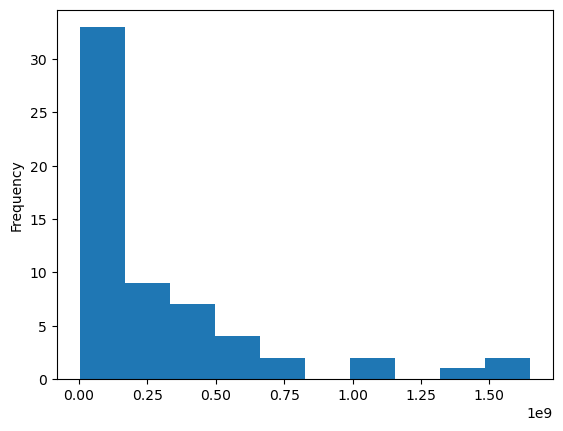

In [24]:
df['price'].plot.hist()